# Agenda: Plotting

1. Visualization (in general, and in Python)
2. Plotting with a series
    - Line plots
    - Bar plots (two types)
    - Pie charts (aka pie plots)
    - Box plots
    - Histograms
3. Plotting with data frames
    - How is plotting with a data frame similar to (and different from) plotting on a series?
    - Line plots
    - Bar plots
    - Pie charts
    - Box plots
    - Histograms
4. Scatter plots

Matplotlib is the biggest and best known package for plotting. Pandas provides us with a simple interface to use Matplotlib, giving us most (or even all) of the power, without having to wade through many method calls and obscure options.

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
np.random.seed(0)
s = Series(np.random.randint(0, 100, 10),
           index=list('abcdefghij'))

s

a    44
b    47
c    64
d    67
e    67
f     9
g    83
h    21
i    36
j    87
dtype: int64

<Axes: >

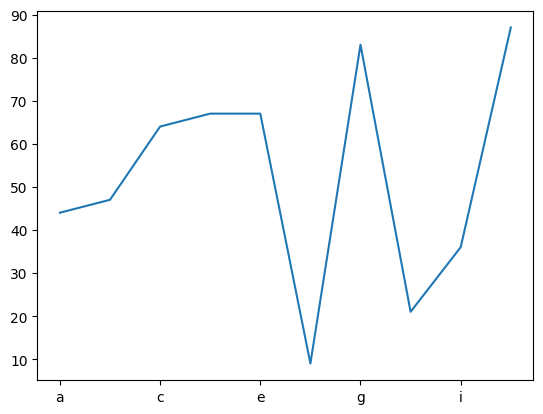

In [3]:
# if I want to plot this data, I can use the Pandas "plot" method.
# If I don't specify anything more, I'll get a line plot

s.plot()

# Plotting notes

- The x axis in the plot is taken from the index in the series
- The y axis in the plot is decided on automatically based on the min/max data values in the series
- The index isn't all shown; only every other index value is

<Axes: >

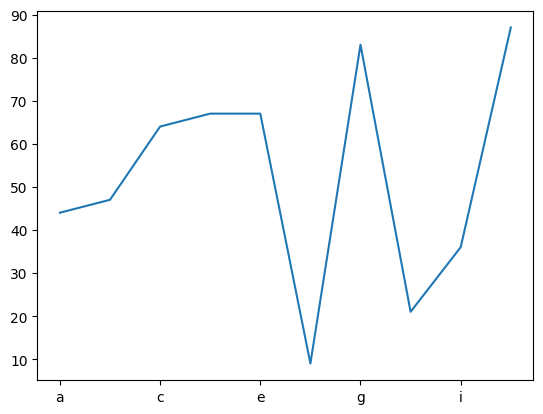

In [4]:
# a better way to create a line plot is to be more explicit
# I can just say

s.plot.line() 

Because Pandas is giving us an interface to the Matplotlib library, we can pass a *lot* of different Matplotlib options to these methods, and they'll be passed along.

<Axes: title={'center': 'The plot thickens'}>

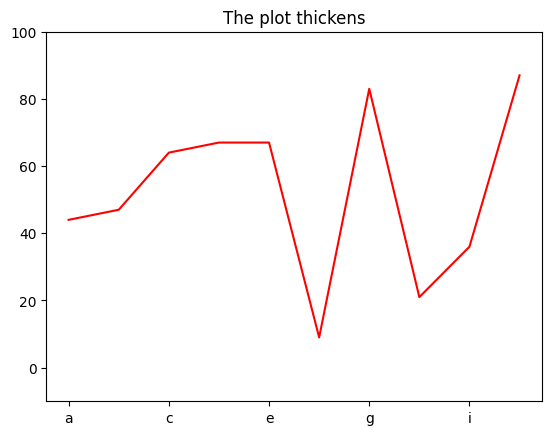

In [6]:
s.plot.line(title='The plot thickens',
            color='red', 
            ylim=(-10, 100) )

<Axes: >

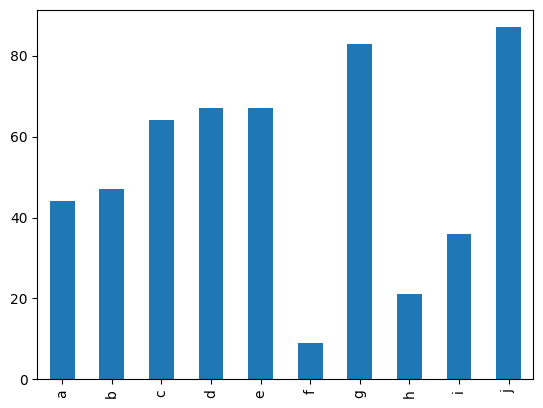

In [7]:
# given the same data, we can also produce a bar plot
# in that case, we will get one (vertical) bar for every data point, i.e., for each index in the series

s.plot.bar()

<Axes: >

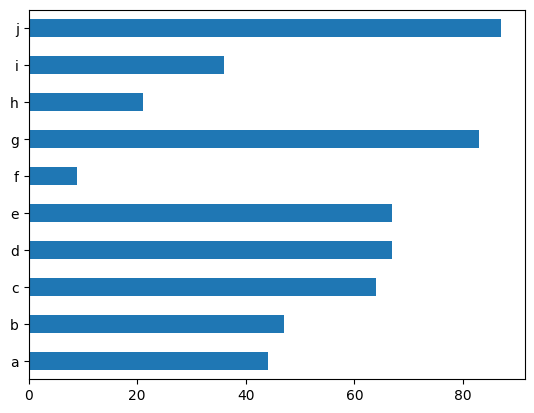

In [8]:
# we can also have horizontal bars

s.plot.barh()

<Axes: >

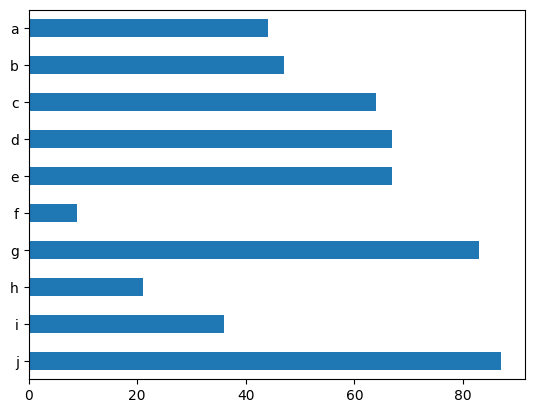

In [9]:
s.sort_index(ascending=False).plot.barh()

# Exercise: Plotting temperature

1. Define a series with 10 integers, representing the forecast high temp for the next 10 days. The index should contains strings in `MMDD` format.
2. Create a line plot from that data (get the forecast from a Web site). Set the y limits to be lower and higher than the temperatue